In [221]:
!pip install -U scikit-learn

In [222]:
def draw_a_picture(x,y):
    plt.scatter(x, y, color='blue', label='y data')
    plt.legend()
    plt.show()

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [251]:
# randomseed
np.random.seed(0)

#data_generation v & x
#v = np.random.normal(25, 8, 100)
v = np.full((100,),25)
x = np.linspace(np.pi*(1/3), np.pi*(1/2), len(v))

#data = np.column_stack((v,x))

# data_set: hight = (v^2*(sin(x))^2)/(2*9.8)
height = (v**2 * (np.sin(x))**2) / (2 * 9.8)

# data_set: distance = (v^2*(sin(2*x)))/(9.8)
distance = (v**2 * np.sin(2*x)) / 9.8

# splitting dataset to training set and testing set 
x_train, x_test, distance_train, distance_test = train_test_split(x, distance, test_size=0.2, random_state=42)

#  data visualization
# plt.scatter(x_train, y_train, color='blue', label='Training data')
# plt.scatter(x_test, y_test, color='red', label='Testing data')
# plt.legend()
# plt.show()


In [304]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
#     Dense(1, input_shape=(1,), activation='linear')
# ])

model = Sequential([
    Dense(5, input_shape=(1,), activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='linear')
])

# create a model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')


In [305]:
history = model.fit(x_train, distance_train, validation_split=0.2, epochs=200, batch_size=2)

Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 1021.9384 - val_loss: 906.4048
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 739.6755 - val_loss: 602.3539
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 444.8784 - val_loss: 425.1167
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 327.9406 - val_loss: 410.6116
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 323.9608 - val_loss: 414.5247
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 325.4805 - val_loss: 408.5397
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 320.6720 - val_loss: 404.1205
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 324.2181 - val_loss: 403.5585
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 319.8795 - val_loss: 400.4710
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss

1/1 [==============================] - 0s 98ms/step - loss: 2.6816


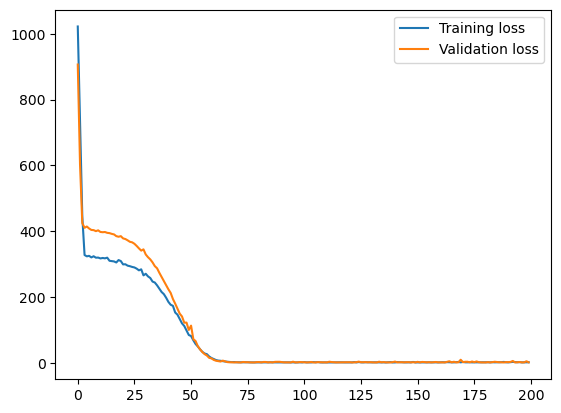

In [306]:
#evaluate model
model.evaluate(x_test, distance_test)

#drawing training history
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 56ms/step


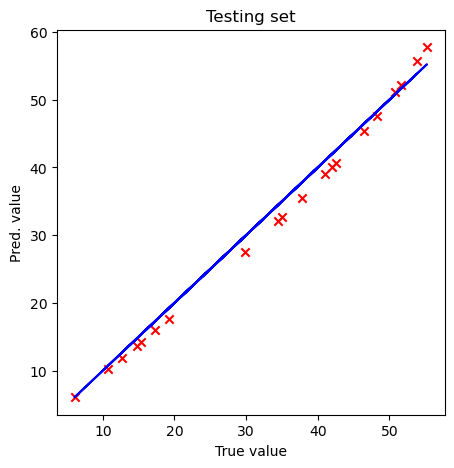

3/3 [==============================] - 0s 2ms/step


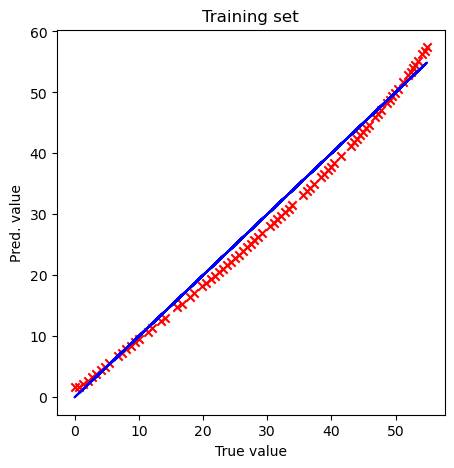

80 20


In [307]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

distance_pred = model.predict(x_test)
plot_scatter(distance_test, distance_pred, "Testing set", "True value", "Pred. value",1)

distance_pred = model.predict(x_train)
plot_scatter(distance_train, distance_pred, "Training set", "True value", "Pred. value",2)

print(len(distance_pred),len(x_test))

3/3 [==============================] - 0s 2ms/step


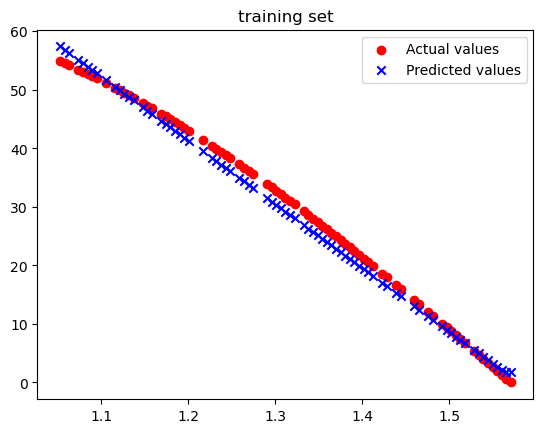

1/1 [==============================] - 0s 20ms/step


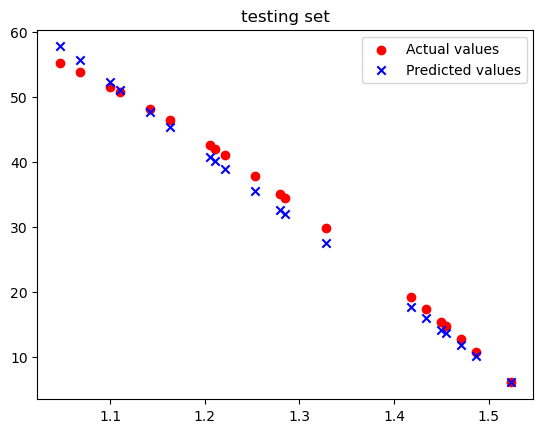

In [308]:
distance_pred = model.predict(x_train)
plt.scatter(x_train, distance_train, color='red', label='Actual values')
plt.scatter(x_train, distance_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()


# using model to perdict
distance_pred = model.predict(x_test)

# visualizing the predict and real value
plt.scatter(x_test, distance_test, color='red', label='Actual values')
plt.scatter(x_test, distance_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()